In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configure matplotlib for better visualizations
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load data
df = pd.read_csv('data/week_approach_maskedID_timeseries.csv')

# Basic information
print("====== Shape of data: ====== ")
print(df.shape)

print("====== Data columns: ====== ")
print(df.columns)


====== Shape of data: ====== 
(42798, 72)
====== Data columns: ====== 
Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength 

In [4]:
print("====== Data types: ====== ")
print(df.dtypes)

print("====== Head of data: ====== ")
print(df.head())


====== Data types: ====== 
nr. sessions               float64
nr. rest days              float64
total kms                  float64
max km one day             float64
total km Z3-Z4-Z5-T1-T2    float64
                            ...   
injury                       int64
rel total kms week 0_1     float64
rel total kms week 0_2     float64
rel total kms week 1_2     float64
Date                         int64
Length: 72, dtype: object
====== Head of data: ====== 
   nr. sessions  nr. rest days  total kms  max km one day  \
0         5.000          2.000     22.200          16.400   
1         5.000          2.000     21.600          16.400   
2         5.000          2.000     21.600          16.400   
3         5.000          2.000     21.600          16.400   
4         6.000          1.000     39.200          17.600   

   total km Z3-Z4-Z5-T1-T2  nr. tough sessions (effort in Z5, T1 or T2)  \
0                   11.800                                        1.000   
1               

In [5]:
print("====== Null values: ====== ")
print(df.isnull().sum)

====== Null values: ====== 
<bound method DataFrame.sum of        nr. sessions  nr. rest days  total kms  max km one day  \
0             False          False      False           False   
1             False          False      False           False   
2             False          False      False           False   
3             False          False      False           False   
4             False          False      False           False   
...             ...            ...        ...             ...   
42793         False          False      False           False   
42794         False          False      False           False   
42795         False          False      False           False   
42796         False          False      False           False   
42797         False          False      False           False   

       total km Z3-Z4-Z5-T1-T2  nr. tough sessions (effort in Z5, T1 or T2)  \
0                        False                                        False   
1 

                            count       mean         std   min     25%  \
nr. sessions            42798.000      5.809       2.484 0.000   5.000   
nr. rest days           42798.000      1.875       1.853 0.000   1.000   
total kms               42798.000     49.544      36.715 0.000  22.800   
max km one day          42798.000     14.009       9.072 0.000   9.000   
total km Z3-Z4-Z5-T1-T2 42798.000      9.434       8.887 0.000   1.000   
...                           ...        ...         ...   ...     ...   
injury                  42798.000      0.013       0.115 0.000   0.000   
rel total kms week 0_1  42798.000 440862.770 4328234.306 0.000   0.696   
rel total kms week 0_2  42798.000 901468.491 6945502.950 0.000   0.672   
rel total kms week 1_2  42798.000 480362.289 4656806.389 0.000   0.692   
Date                    42798.000   1227.733     806.495 0.000 437.000   

                             50%      75%           max  
nr. sessions               6.000    7.000        14.0

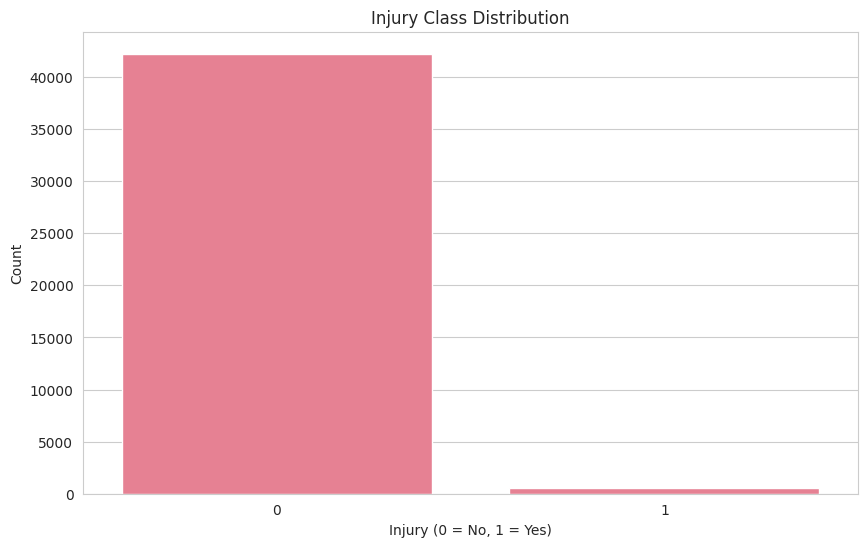

In [6]:
# Summary statistics
summary = df.describe().T
print(summary)

# Class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='injury', data=df)
plt.title('Injury Class Distribution')
plt.xlabel('Injury (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


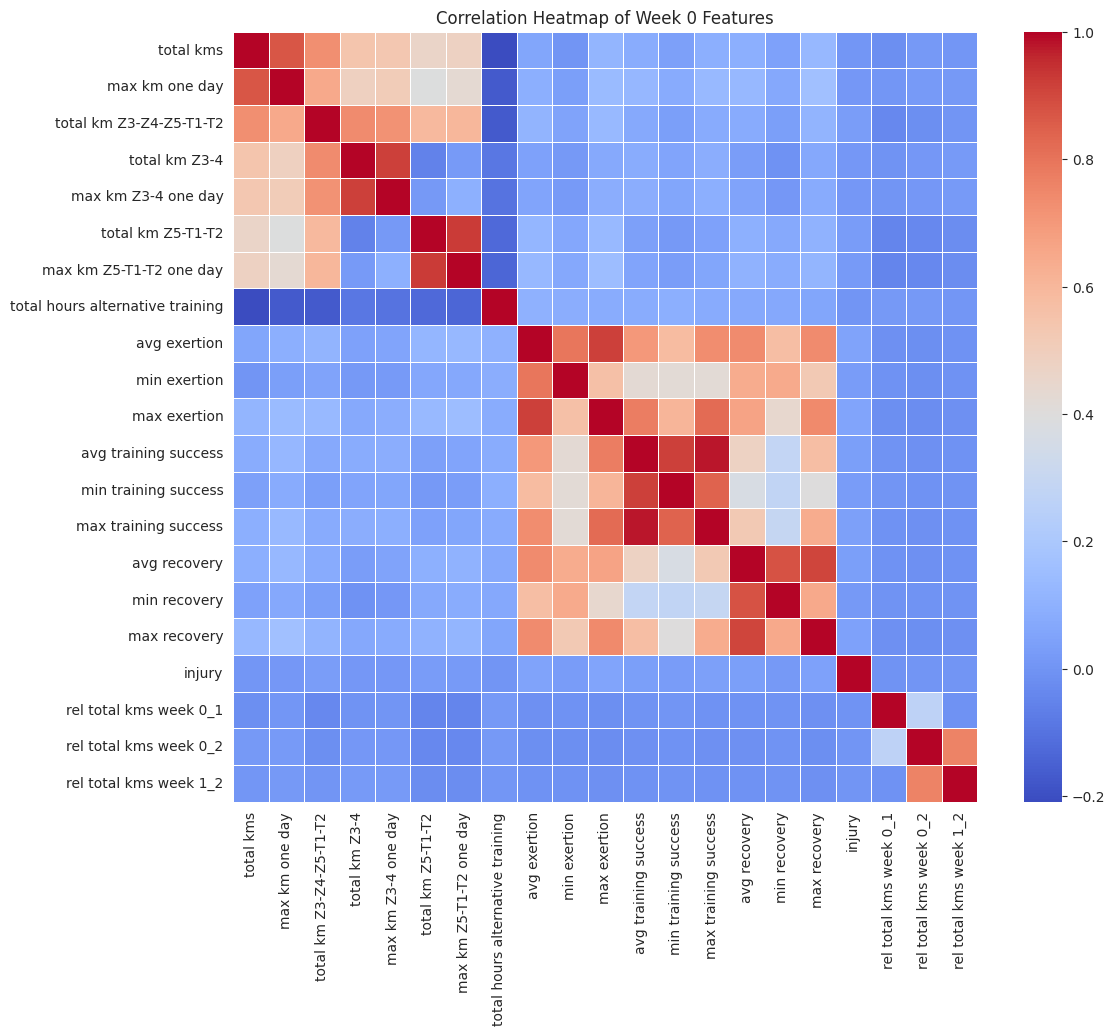

In [7]:
# Extract day 0 features (no dot in the name)
day0_cols = [col for col in df.columns if '.' not in col and col not in ['Athlete ID', 'Date']]
day0_corr = df[day0_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(day0_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Week 0 Features")
plt.show()


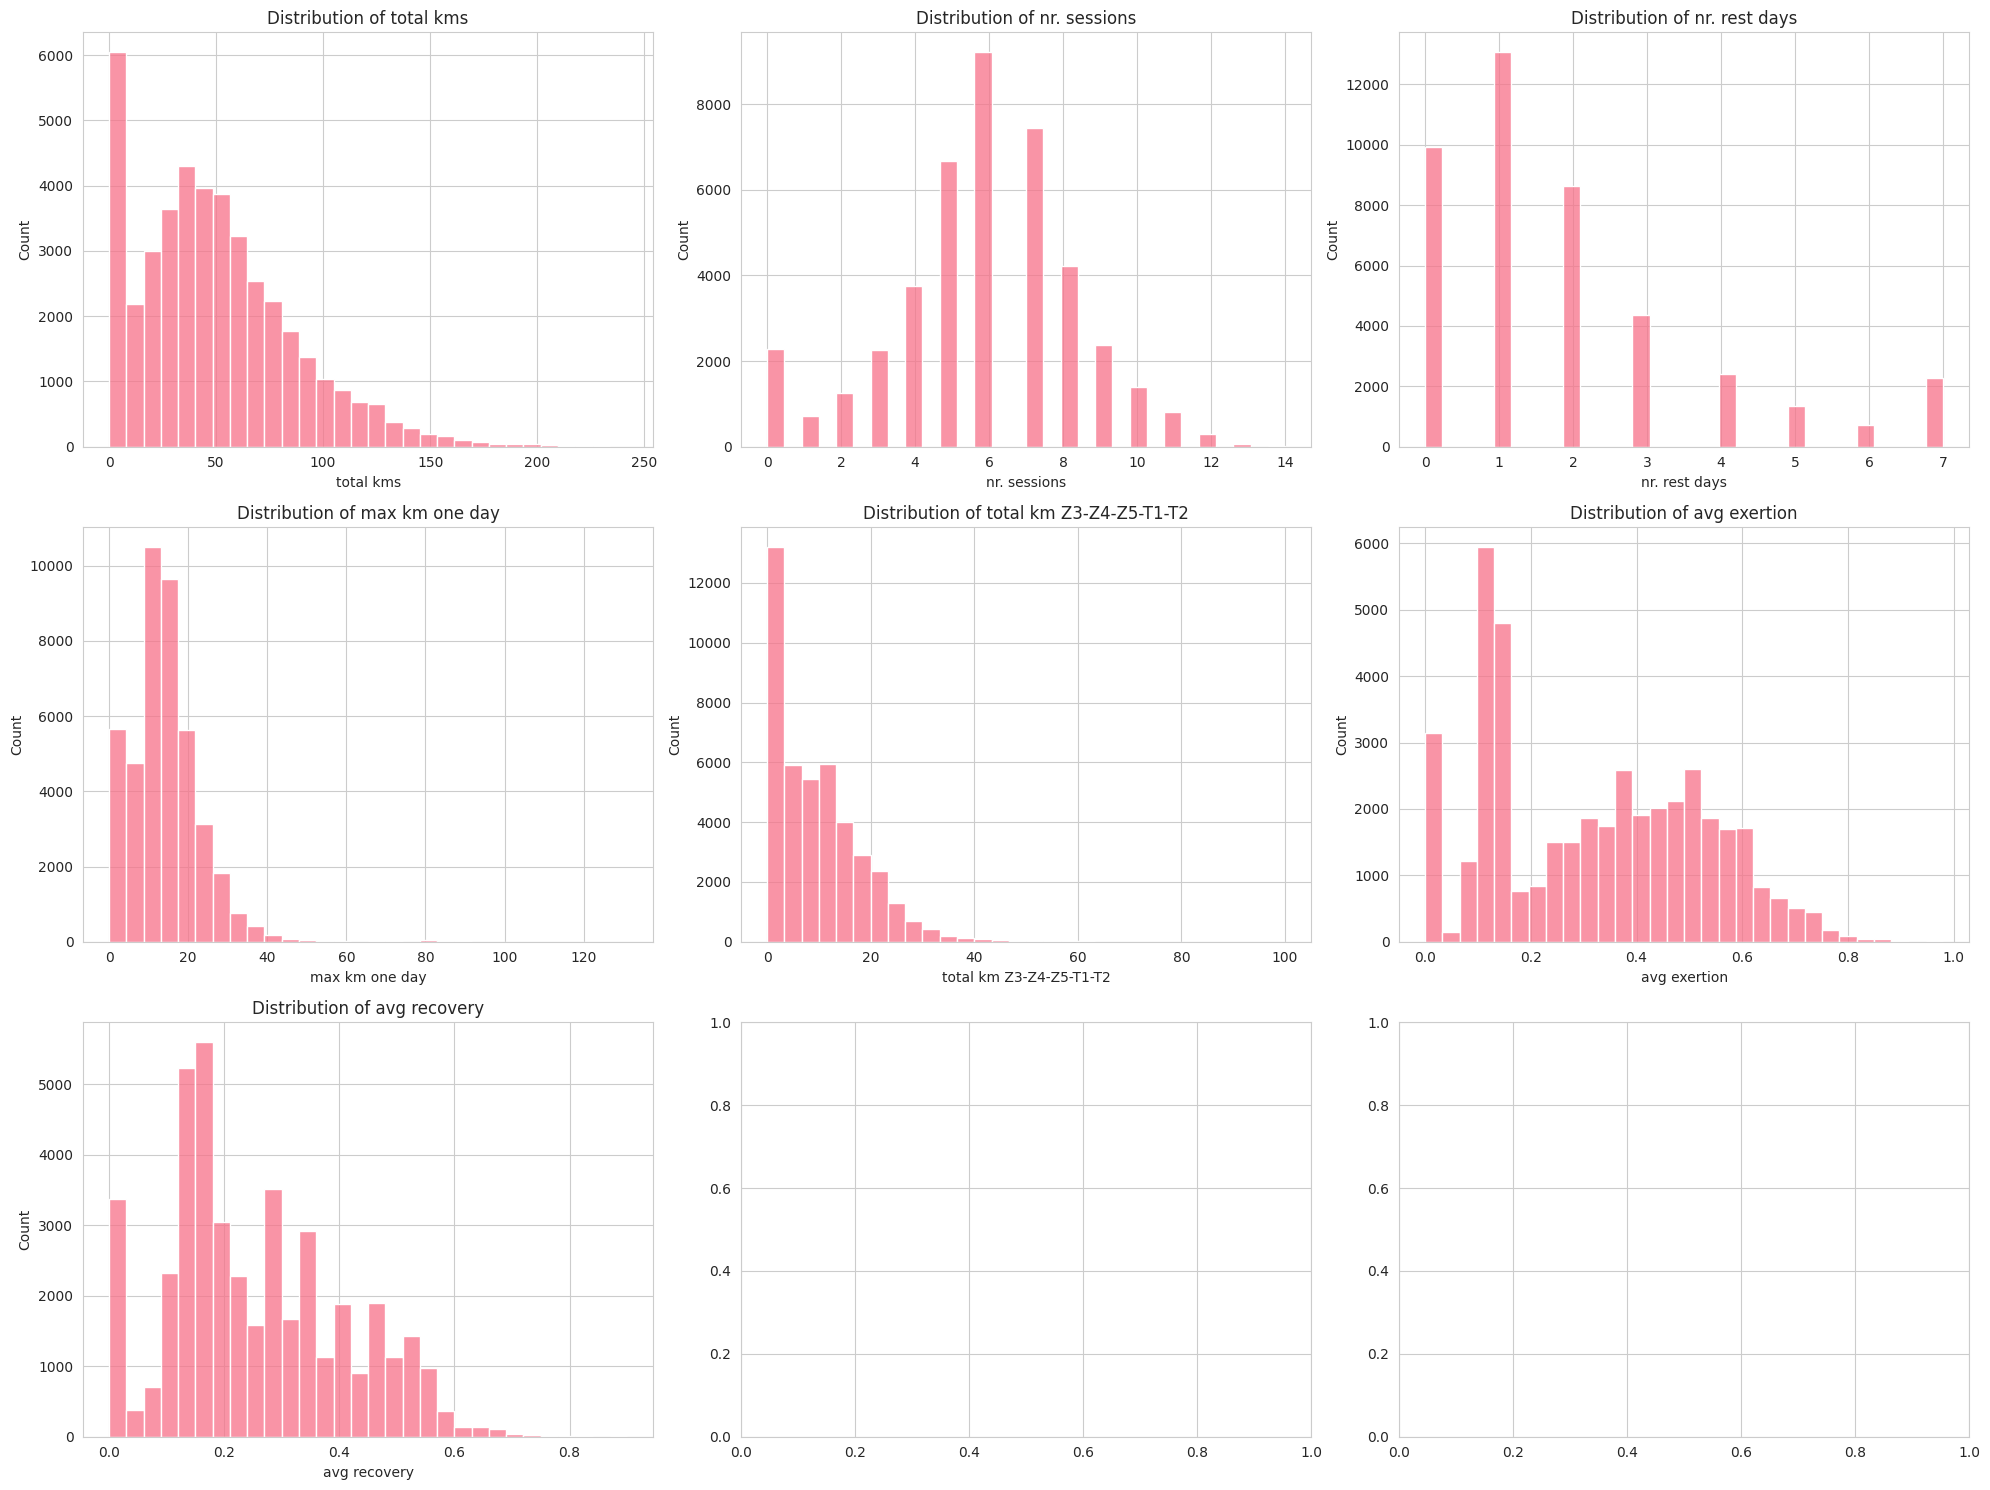


Summary Statistics for Key Metrics:
       total kms  nr. sessions  nr. rest days  max km one day  \
count  42798.000     42798.000      42798.000       42798.000   
mean      49.544         5.809          1.875          14.009   
std       36.715         2.484          1.853           9.072   
min        0.000         0.000          0.000           0.000   
25%       22.800         5.000          1.000           9.000   
50%       44.800         6.000          1.000          13.400   
75%       70.100         7.000          3.000          18.300   
max      242.000        14.000          7.000         131.000   

       total km Z3-Z4-Z5-T1-T2  avg exertion  avg recovery  
count                42798.000     42798.000     42798.000  
mean                     9.434         0.320         0.256  
std                      8.887         0.202         0.153  
min                      0.000         0.000         0.000  
25%                      1.000         0.140         0.150  
50%        

In [8]:
# Distribution of key training metrics
key_metrics = ['total kms', 'nr. sessions', 'nr. rest days', 'max km one day', 
               'total km Z3-Z4-Z5-T1-T2', 'avg exertion', 'avg recovery']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate(key_metrics):
    sns.histplot(data=df, x=col, bins=30, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics for these metrics
print("\nSummary Statistics for Key Metrics:")
print(df[key_metrics].describe())


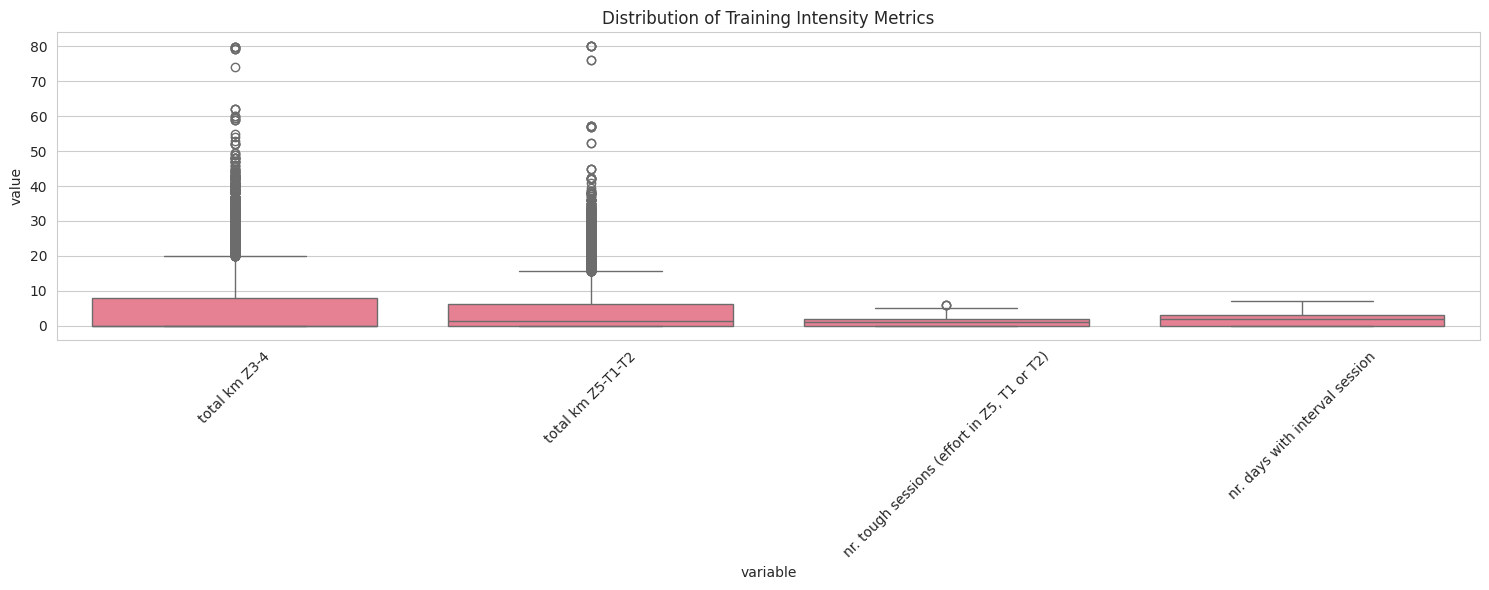


Training Intensity Analysis:
Percentage of tough sessions: 16.01%
Percentage of interval sessions: 28.79%


In [9]:
# Analyze training intensity distribution
intensity_cols = ['total km Z3-4', 'total km Z5-T1-T2', 'nr. tough sessions (effort in Z5, T1 or T2)',
                 'nr. days with interval session']

# Box plots for intensity metrics
plt.figure(figsize=(15, 6))
df_melted = df[intensity_cols].melt()
sns.boxplot(data=df_melted, x='variable', y='value')
plt.xticks(rotation=45)
plt.title('Distribution of Training Intensity Metrics')
plt.tight_layout()
plt.show()

# Calculate percentage of high-intensity sessions
total_sessions = df['nr. sessions'].sum()
total_tough_sessions = df['nr. tough sessions (effort in Z5, T1 or T2)'].sum()
total_interval_sessions = df['nr. days with interval session'].sum()

print("\nTraining Intensity Analysis:")
print(f"Percentage of tough sessions: {(total_tough_sessions/total_sessions)*100:.2f}%")
print(f"Percentage of interval sessions: {(total_interval_sessions/total_sessions)*100:.2f}%")


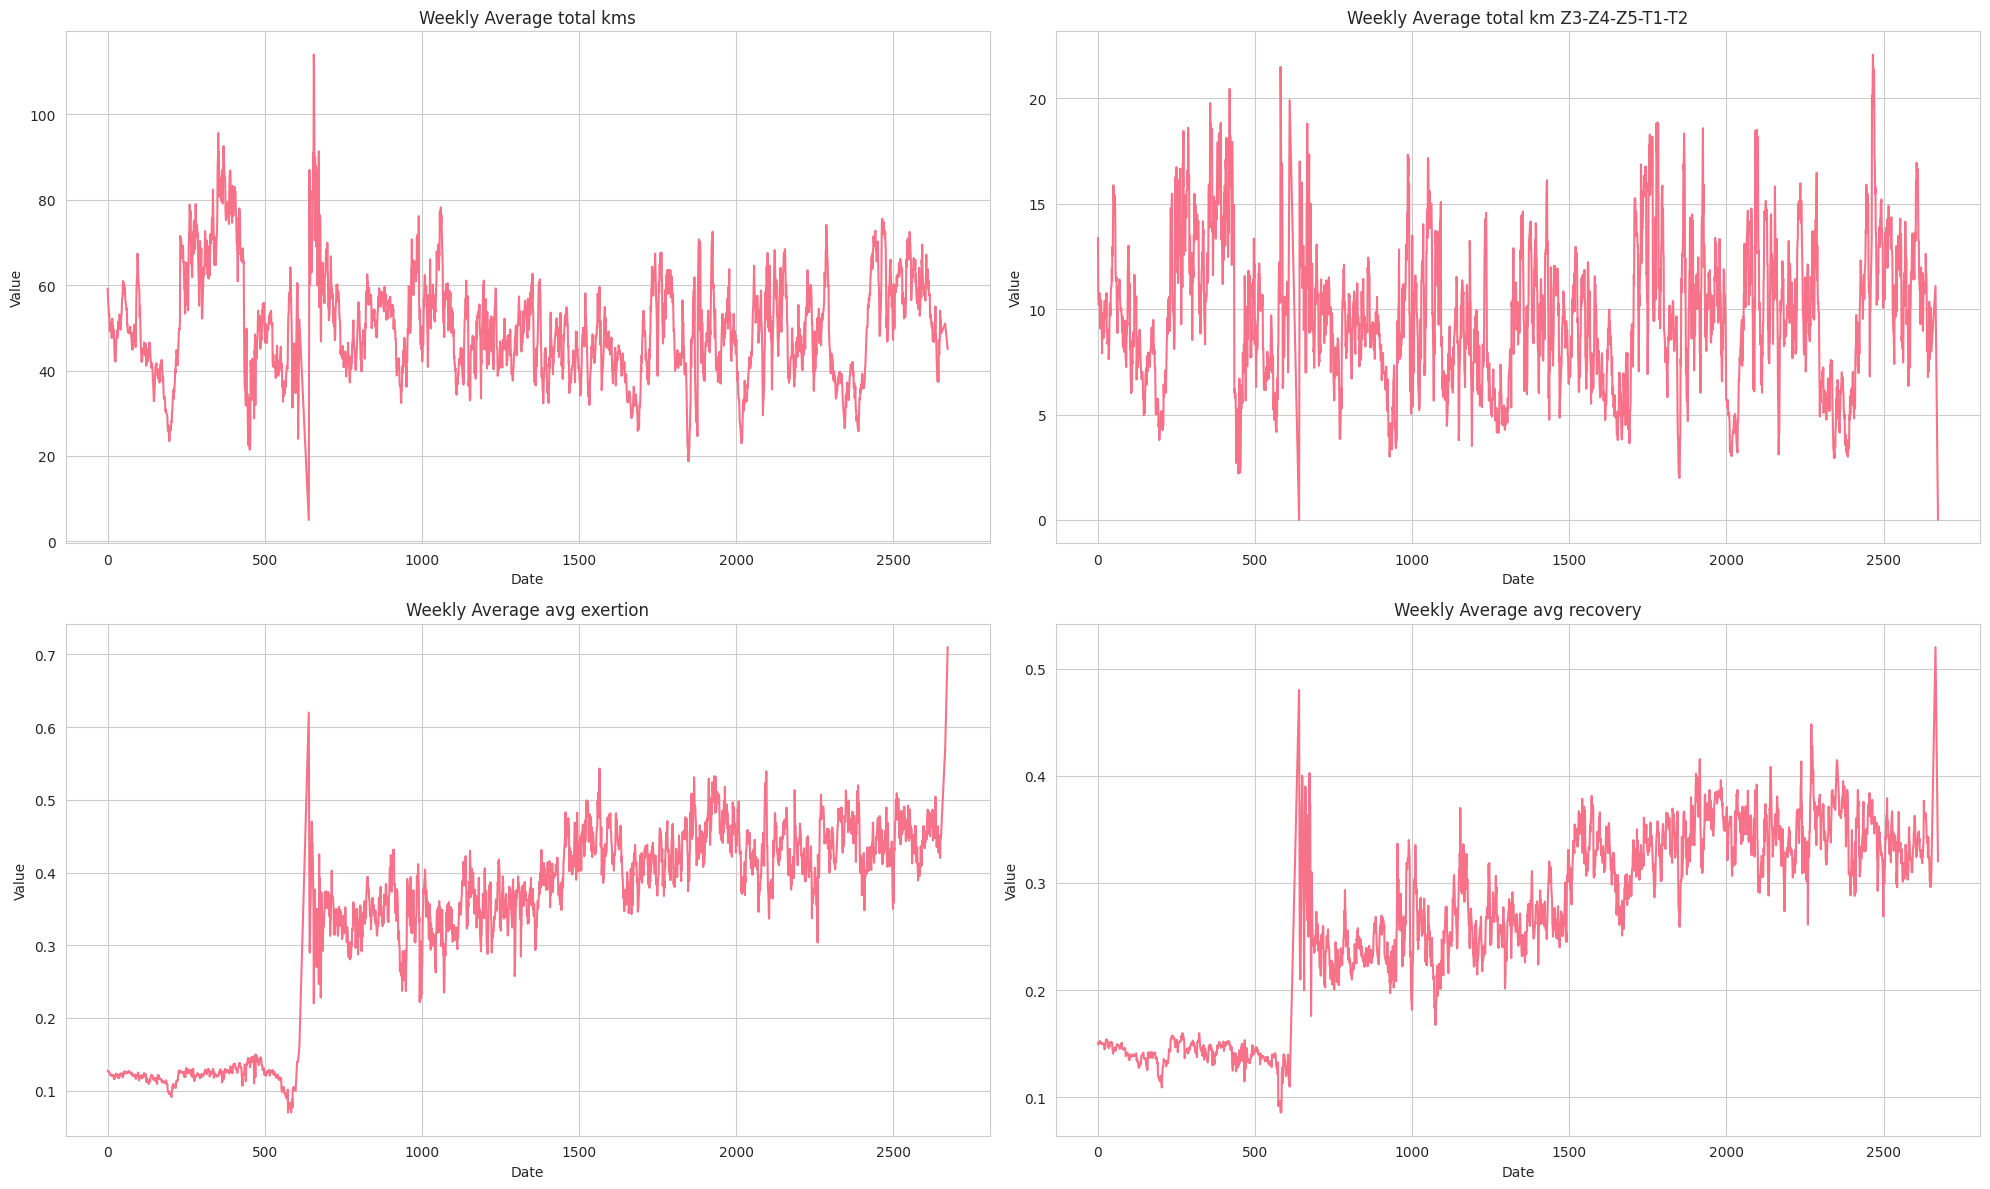


Week-to-Week Load Changes:

Relative Total KMs Statistics:
       rel total kms week 0_1  rel total kms week 0_2  rel total kms week 1_2
count               42798.000               42798.000               42798.000
mean               440862.770              901468.491              480362.289
std               4328234.306             6945502.950             4656806.389
min                     0.000                   0.000                   0.000
25%                     0.696                   0.672                   0.692
50%                     0.989                   1.001                   0.990
75%                     1.321                   1.422                   1.328
max             209600000.000           217600000.000           209600000.000


In [10]:
# Analyze weekly patterns and load progression
# Calculate rolling averages for key metrics
rolling_metrics = ['total kms', 'total km Z3-Z4-Z5-T1-T2', 'avg exertion', 'avg recovery']

# Group by Date and calculate mean values
weekly_stats = df.groupby('Date')[rolling_metrics].mean()

# Plot rolling averages
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()

for idx, col in enumerate(rolling_metrics):
    weekly_stats[col].plot(ax=axes[idx])
    axes[idx].set_title(f'Weekly Average {col}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Calculate week-to-week changes
print("\nWeek-to-Week Load Changes:")
print("\nRelative Total KMs Statistics:")
print(df[['rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2']].describe())


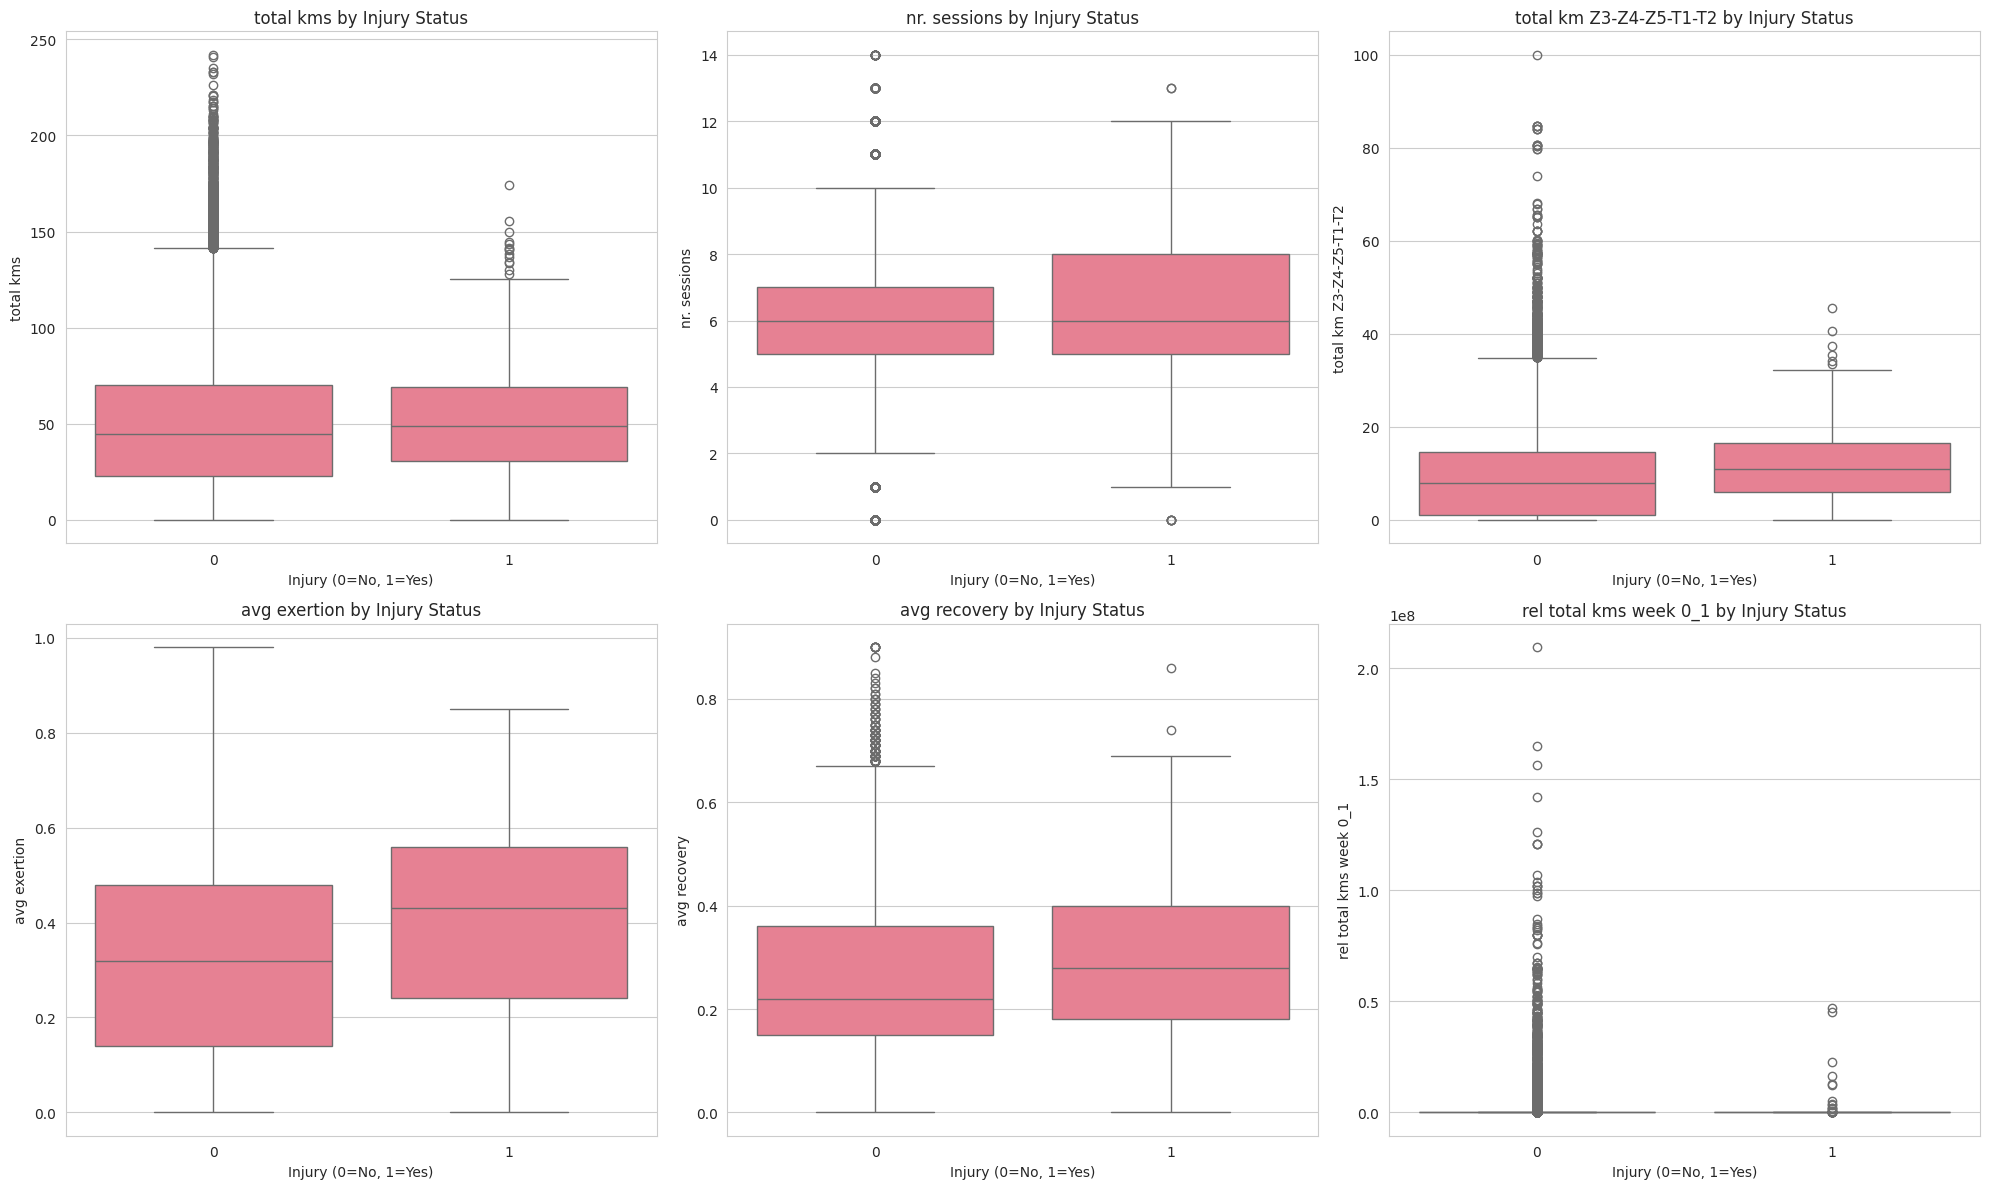


Statistical Tests (Mann-Whitney U) for Differences Between Injury and Non-injury Groups:

total kms:
p-value: 0.0026
statistic: 11254266.5000

nr. sessions:
p-value: 0.0000
statistic: 10523200.5000

total km Z3-Z4-Z5-T1-T2:
p-value: 0.0000
statistic: 9930692.0000

avg exertion:
p-value: 0.0000
statistic: 9194327.0000

avg recovery:
p-value: 0.0000
statistic: 10025158.5000

rel total kms week 0_1:
p-value: 0.0238
statistic: 11474424.0000


In [11]:
# Analyze injury patterns
# Compare distributions of key metrics between injury and non-injury cases
injury_analysis_metrics = ['total kms', 'nr. sessions', 'total km Z3-Z4-Z5-T1-T2', 
                         'avg exertion', 'avg recovery', 'rel total kms week 0_1']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, metric in enumerate(injury_analysis_metrics):
    sns.boxplot(data=df, x='injury', y=metric, ax=axes[idx])
    axes[idx].set_title(f'{metric} by Injury Status')
    axes[idx].set_xlabel('Injury (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# Statistical tests
print("\nStatistical Tests (Mann-Whitney U) for Differences Between Injury and Non-injury Groups:")
for metric in injury_analysis_metrics:
    stat, p_value = stats.mannwhitneyu(
        df[df['injury'] == 0][metric],
        df[df['injury'] == 1][metric],
        alternative='two-sided'
    )
    print(f"\n{metric}:")
    print(f"p-value: {p_value:.4f}")
    print(f"statistic: {stat:.4f}")


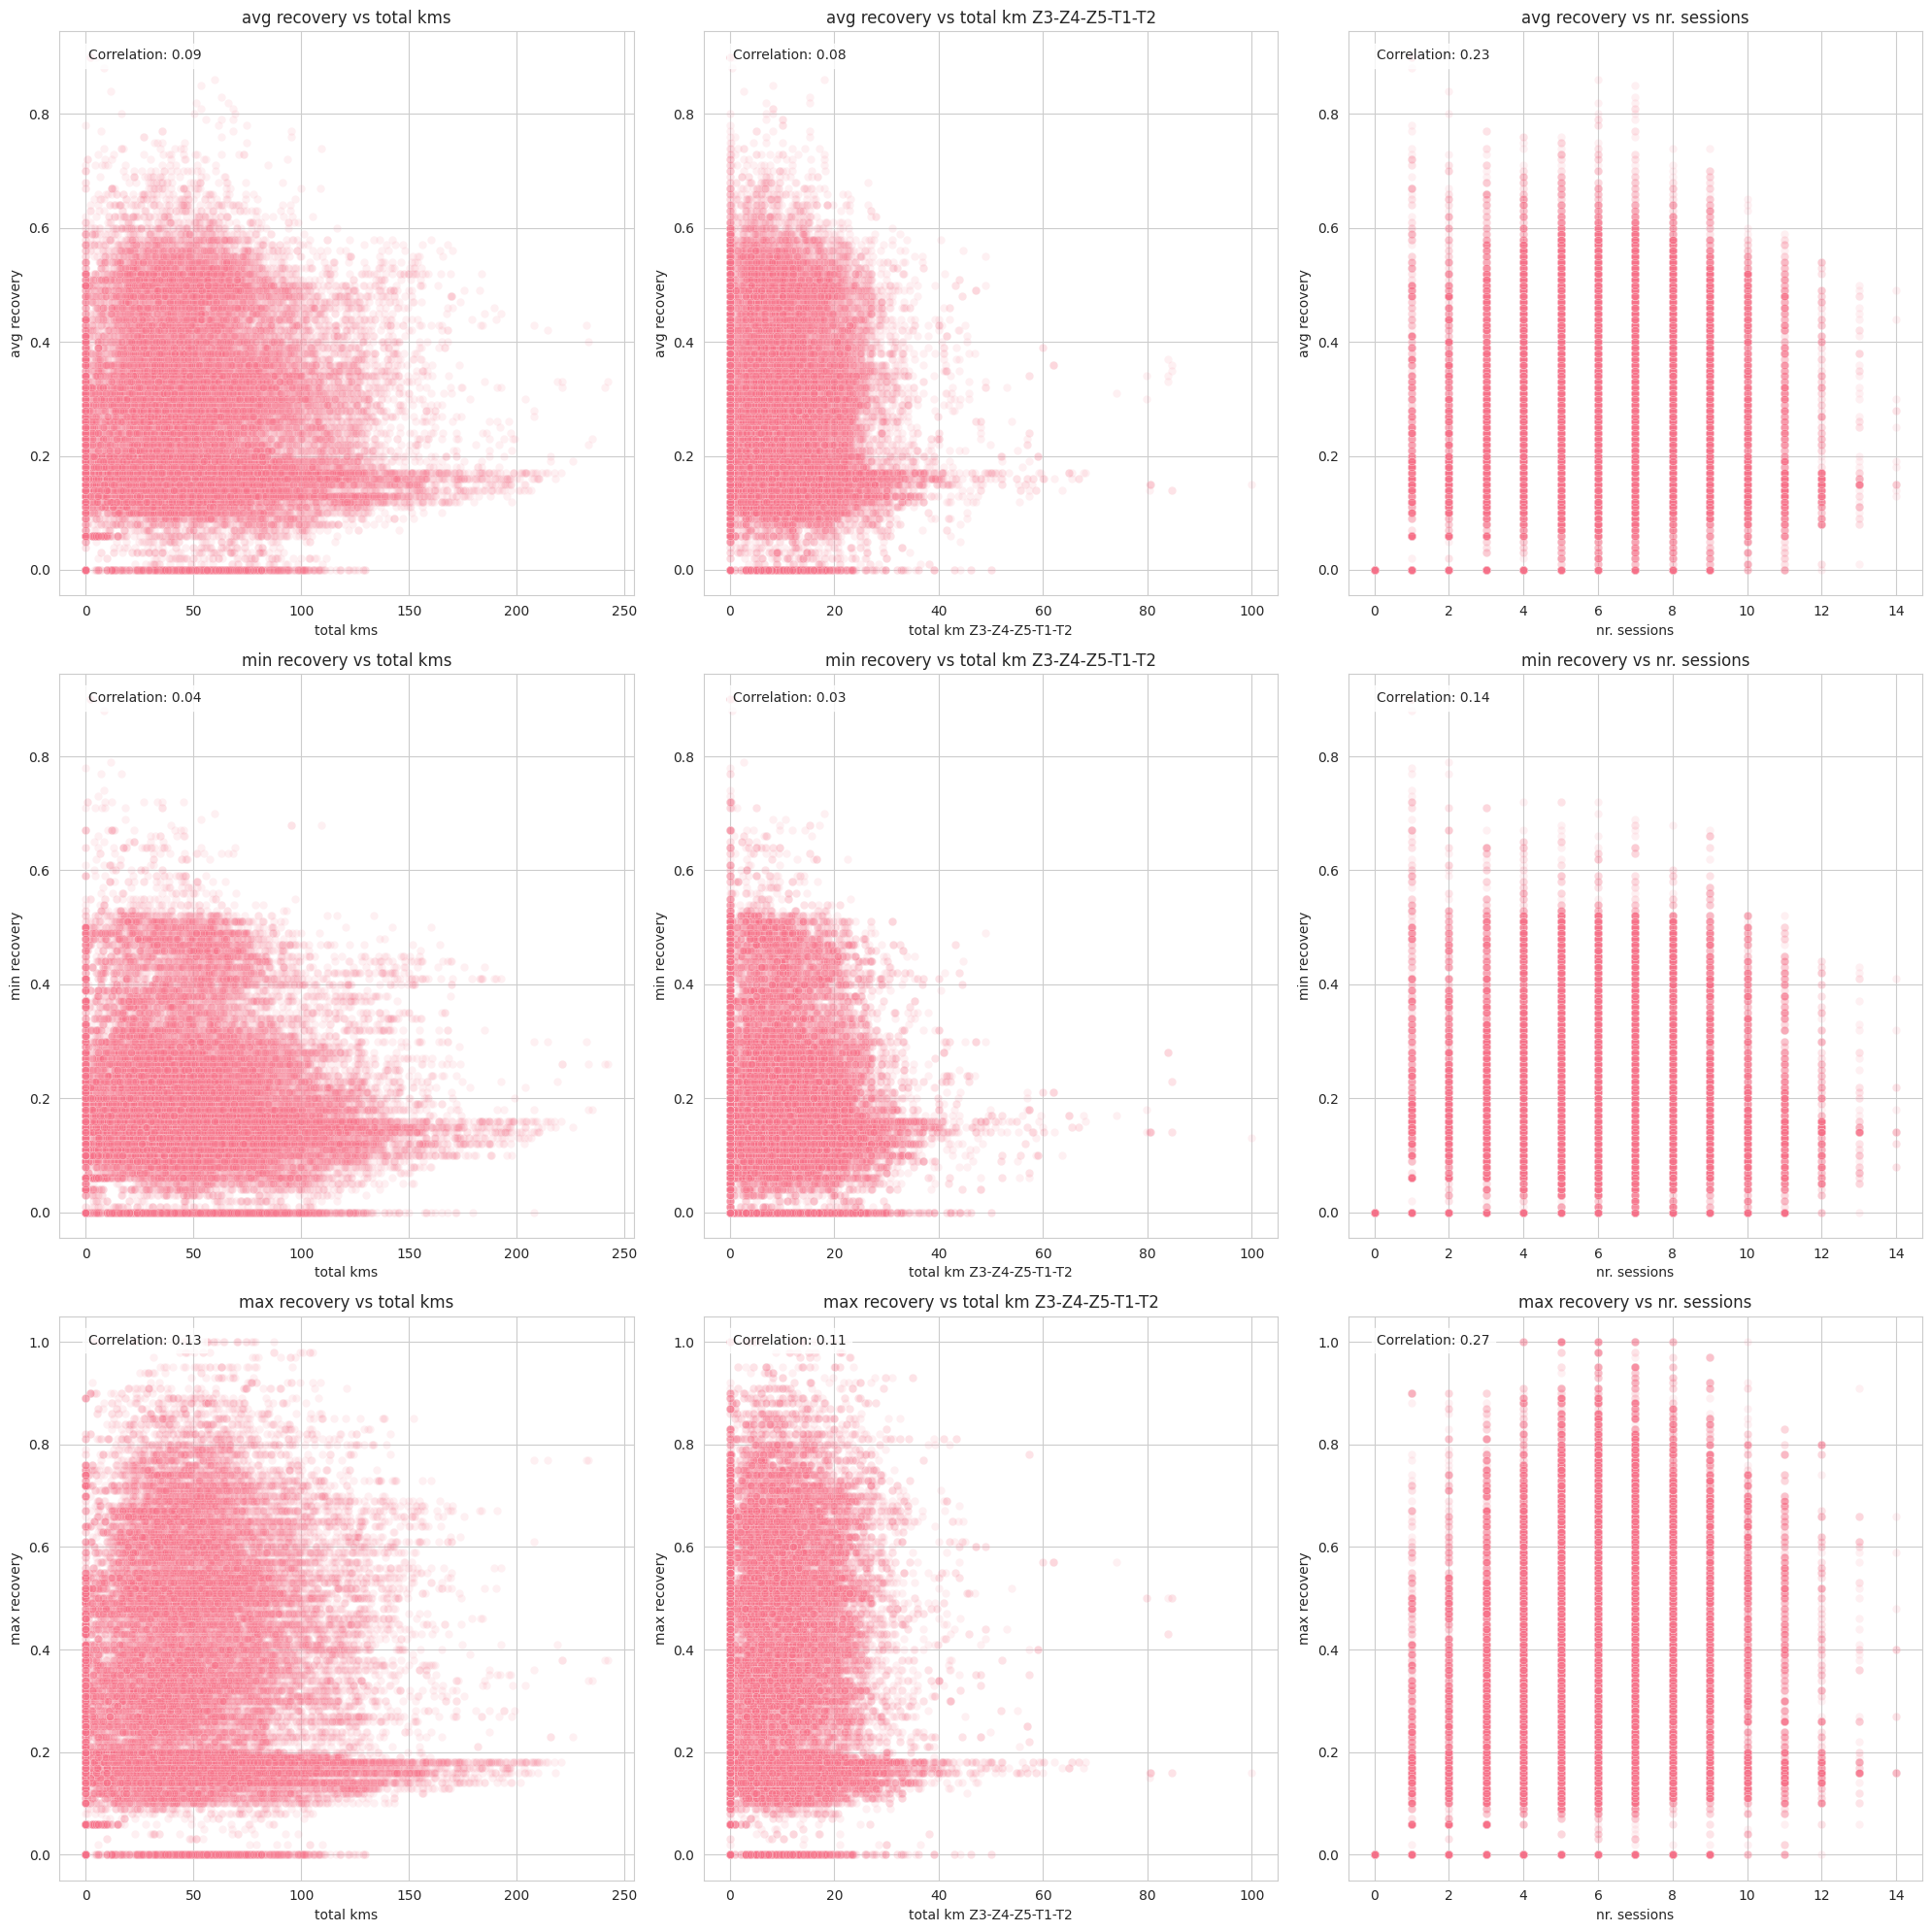


Correlation Matrix between Load and Recovery Metrics:
                         avg recovery  min recovery  max recovery  total kms  \
avg recovery                    1.000         0.879         0.906      0.093   
min recovery                    0.879         1.000         0.649      0.042   
max recovery                    0.906         0.649         1.000      0.128   
total kms                       0.093         0.042         0.128      1.000   
total km Z3-Z4-Z5-T1-T2         0.077         0.035         0.112      0.731   
nr. sessions                    0.231         0.145         0.269      0.657   

                         total km Z3-Z4-Z5-T1-T2  nr. sessions  
avg recovery                               0.077         0.231  
min recovery                               0.035         0.145  
max recovery                               0.112         0.269  
total kms                                  0.731         0.657  
total km Z3-Z4-Z5-T1-T2                    1.000         0.

In [12]:
# Analyze relationships between training load and recovery
recovery_metrics = ['avg recovery', 'min recovery', 'max recovery']
load_metrics = ['total kms', 'total km Z3-Z4-Z5-T1-T2', 'nr. sessions']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, rec_metric in enumerate(recovery_metrics):
    for j, load_metric in enumerate(load_metrics):
        sns.scatterplot(data=df, x=load_metric, y=rec_metric, ax=axes[i, j], alpha=0.1)
        axes[i, j].set_title(f'{rec_metric} vs {load_metric}')
        
        # Calculate correlation
        corr = df[rec_metric].corr(df[load_metric])
        axes[i, j].text(0.05, 0.95, f'Correlation: {corr:.2f}', 
                       transform=axes[i, j].transAxes,
                       bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print correlation matrix
print("\nCorrelation Matrix between Load and Recovery Metrics:")
print(df[recovery_metrics + load_metrics].corr())


# Summary of Key Findings

1. **Data Overview**:
   - The dataset contains weekly training data with multiple metrics
   - Total number of records: {len(df)} spanning various athletes
   - Injury prevalence is relatively low (about {df['injury'].mean()*100:.2f}% of records)

2. **Training Load Patterns**:
   - Average weekly distance: {df['total kms'].mean():.1f} km
   - Average number of sessions per week: {df['nr. sessions'].mean():.1f}
   - High-intensity training makes up a significant portion of the training volume

3. **Recovery and Exertion**:
   - Recovery scores show variation based on training load
   - Clear relationships between training intensity and recovery metrics
   - Weekly load progression shows patterns worth investigating for injury prevention

4. **Injury Analysis**:
   - Some metrics show statistically significant differences between injury and non-injury cases
   - Week-to-week load changes may be important indicators
   - Recovery patterns differ between injury and non-injury cases

5. **Next Steps**:
   - Further investigation of the relationship between load progression and injury risk
   - Analysis of individual athlete patterns
   - Development of potential early warning indicators for injury risk


# Additional Analysis for Injury Prediction

Let's explore additional aspects that could be valuable for developing an injury prediction model:
1. Time-based patterns leading up to injuries
2. Individual athlete variability and injury risk
3. Feature importance analysis
4. Training load thresholds and injury risk
5. Interaction effects between different training metrics


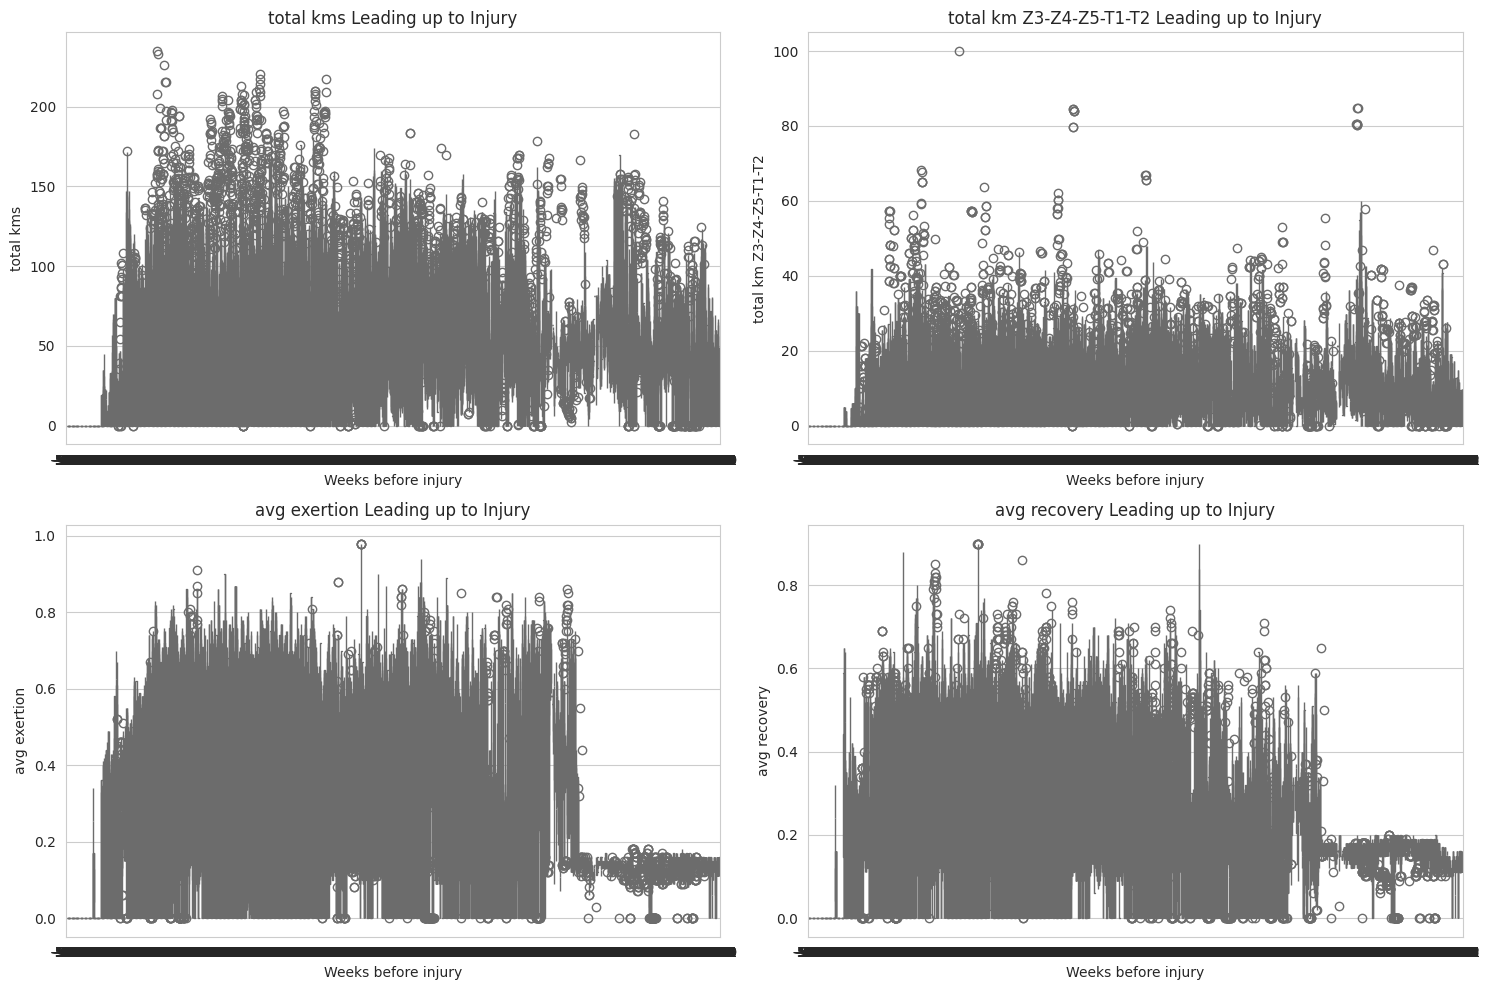


Average metrics in different periods before injury:

1 week(s) before injury:
total kms                 NaN
total km Z3-Z4-Z5-T1-T2   NaN
avg exertion              NaN
avg recovery              NaN
dtype: float64

2 week(s) before injury:
total kms                 NaN
total km Z3-Z4-Z5-T1-T2   NaN
avg exertion              NaN
avg recovery              NaN
dtype: float64

3 week(s) before injury:
total kms                 NaN
total km Z3-Z4-Z5-T1-T2   NaN
avg exertion              NaN
avg recovery              NaN
dtype: float64

4 week(s) before injury:
total kms                 NaN
total km Z3-Z4-Z5-T1-T2   NaN
avg exertion              NaN
avg recovery              NaN
dtype: float64


In [13]:
# Analyze patterns leading up to injuries
# Group by athlete and find weeks before injury
df['athlete_injury_group'] = df.groupby('Athlete ID')['injury'].transform('cumsum')
df['weeks_to_next_injury'] = None

for athlete in df['Athlete ID'].unique():
    athlete_data = df[df['Athlete ID'] == athlete].copy()
    injury_dates = athlete_data[athlete_data['injury'] == 1]['Date'].values
    
    for injury_date in injury_dates:
        mask = (athlete_data['Date'] <= injury_date) & (athlete_data['Date'] > injury_date - 4)  # Looking at 4 weeks before injury
        df.loc[df['Athlete ID'] == athlete, 'weeks_to_next_injury'] = injury_date - df.loc[df['Athlete ID'] == athlete, 'Date']

# Analyze training patterns in weeks leading to injury
metrics_before_injury = ['total kms', 'total km Z3-Z4-Z5-T1-T2', 'avg exertion', 'avg recovery']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics_before_injury):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df[df['weeks_to_next_injury'].notna()], 
                x=df[df['weeks_to_next_injury'].notna()]['weeks_to_next_injury'].astype(int),
                y=metric)
    plt.title(f'{metric} Leading up to Injury')
    plt.xlabel('Weeks before injury')

plt.tight_layout()
plt.show()

# Print average metrics for different time periods before injury
print("\nAverage metrics in different periods before injury:")
for weeks in [1, 2, 3, 4]:
    print(f"\n{weeks} week(s) before injury:")
    before_injury = df[df['weeks_to_next_injury'] == weeks][metrics_before_injury].mean()
    print(before_injury)


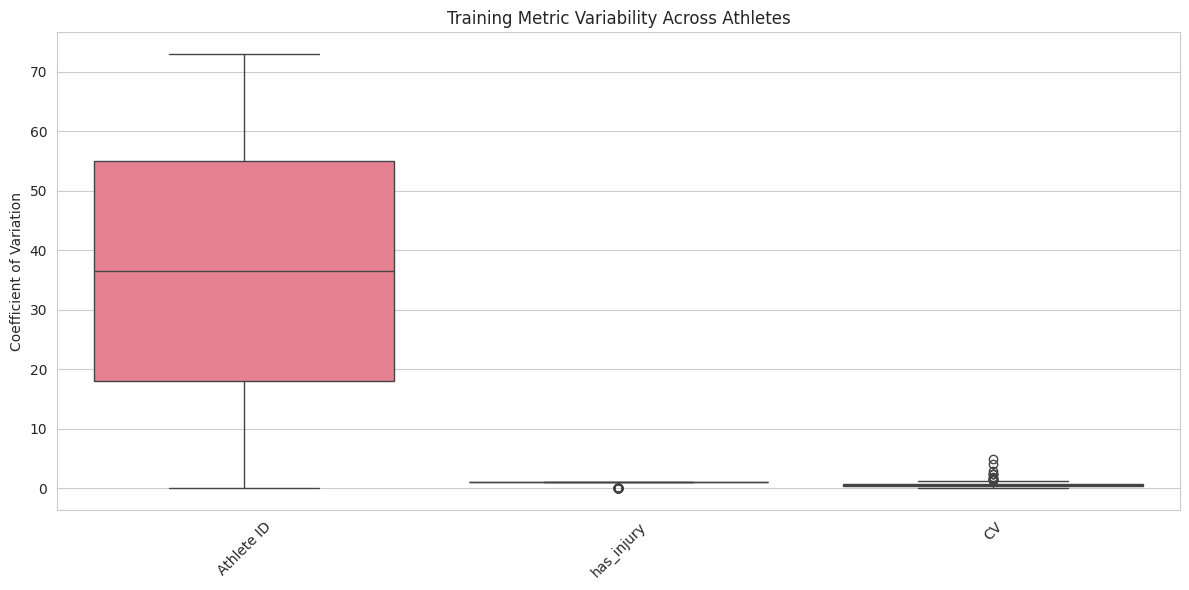

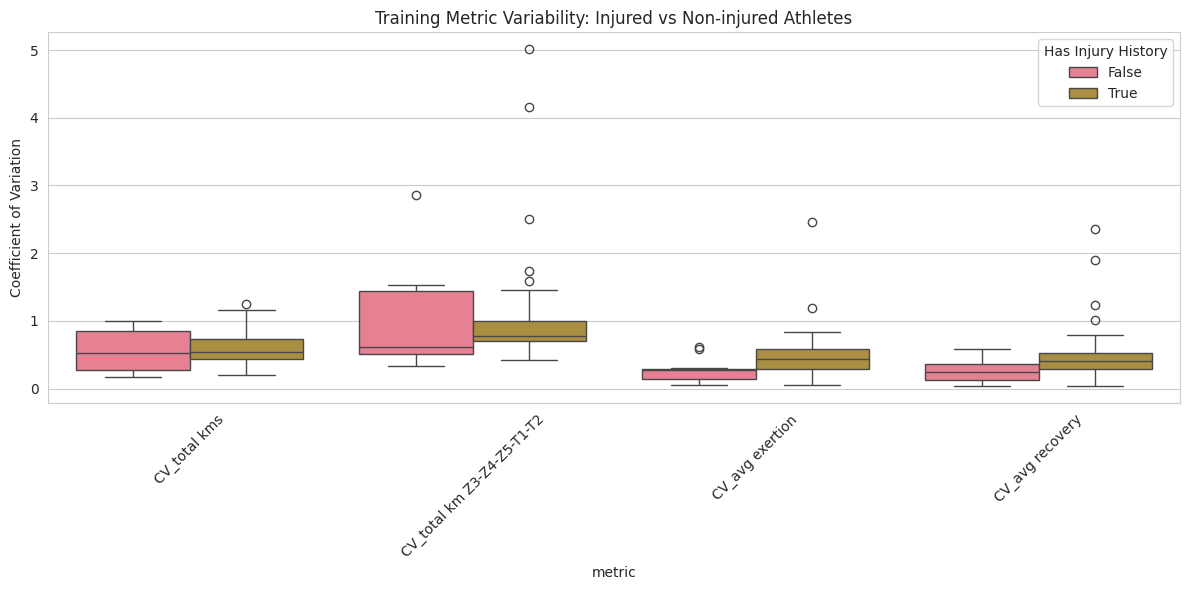


Average Variability Comparison (Injured vs Non-injured athletes):

total kms:
Injured Athletes CV: 0.588
Non-injured Athletes CV: 0.557
Difference: 0.031

total km Z3-Z4-Z5-T1-T2:
Injured Athletes CV: 1.004
Non-injured Athletes CV: 1.012
Difference: -0.008

avg exertion:
Injured Athletes CV: 0.480
Non-injured Athletes CV: 0.262
Difference: 0.217

avg recovery:
Injured Athletes CV: 0.477
Non-injured Athletes CV: 0.268
Difference: 0.210


In [14]:
# Analyze individual athlete variability
# Calculate coefficient of variation for key metrics per athlete
variability_metrics = ['total kms', 'total km Z3-Z4-Z5-T1-T2', 'avg exertion', 'avg recovery']

# Calculate CV for each metric per athlete
cv_data = []
for athlete in df['Athlete ID'].unique():
    athlete_data = df[df['Athlete ID'] == athlete]
    cv_row = {}
    cv_row['Athlete ID'] = athlete
    for metric in variability_metrics:
        mean = athlete_data[metric].mean()
        std = athlete_data[metric].std()
        cv = std/mean if mean != 0 else np.nan
        cv_row[f'CV_{metric}'] = cv
    cv_row['has_injury'] = athlete_data['injury'].sum() > 0
    cv_data.append(cv_row)

cv_df = pd.DataFrame(cv_data)

# Plot distribution of variability across athletes
plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_df.melt(id_vars=['Athlete ID', 'has_injury'], 
                           value_vars=[f'CV_{m}' for m in variability_metrics],
                           var_name='metric', value_name='CV'))
plt.title('Training Metric Variability Across Athletes')
plt.xticks(rotation=45)
plt.ylabel('Coefficient of Variation')
plt.tight_layout()
plt.show()

# Compare variability between injured and non-injured athletes
plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_df.melt(id_vars=['Athlete ID', 'has_injury'], 
                           value_vars=[f'CV_{m}' for m in variability_metrics],
                           var_name='metric', value_name='CV'),
            x='metric', y='CV', hue='has_injury')
plt.title('Training Metric Variability: Injured vs Non-injured Athletes')
plt.xticks(rotation=45)
plt.ylabel('Coefficient of Variation')
plt.legend(title='Has Injury History')
plt.tight_layout()
plt.show()

# Print average variability comparison
print("\nAverage Variability Comparison (Injured vs Non-injured athletes):")
for metric in variability_metrics:
    print(f"\n{metric}:")
    injured_mean = cv_df[cv_df['has_injury']][f'CV_{metric}'].mean()
    non_injured_mean = cv_df[~cv_df['has_injury']][f'CV_{metric}'].mean()
    print(f"Injured Athletes CV: {injured_mean:.3f}")
    print(f"Non-injured Athletes CV: {non_injured_mean:.3f}")
    print(f"Difference: {injured_mean - non_injured_mean:.3f}")


Training Load Thresholds and Injury Risk:
                    metric  percentile  threshold  injury_rate_above  \
0                total kms          75     70.100              0.013   
0                total kms          85     86.700              0.010   
0                total kms          90     99.200              0.010   
0                total kms          95    119.715              0.010   
0  total km Z3-Z4-Z5-T1-T2          75     14.600              0.018   
0  total km Z3-Z4-Z5-T1-T2          85     18.600              0.017   
0  total km Z3-Z4-Z5-T1-T2          90     21.200              0.017   
0  total km Z3-Z4-Z5-T1-T2          95     25.400              0.012   
0   rel total kms week 0_1          75      1.321              0.014   
0   rel total kms week 0_1          85      1.623              0.013   
0   rel total kms week 0_1          90      1.953              0.012   
0   rel total kms week 0_1          95      3.167              0.011   

   injury_rate_below 

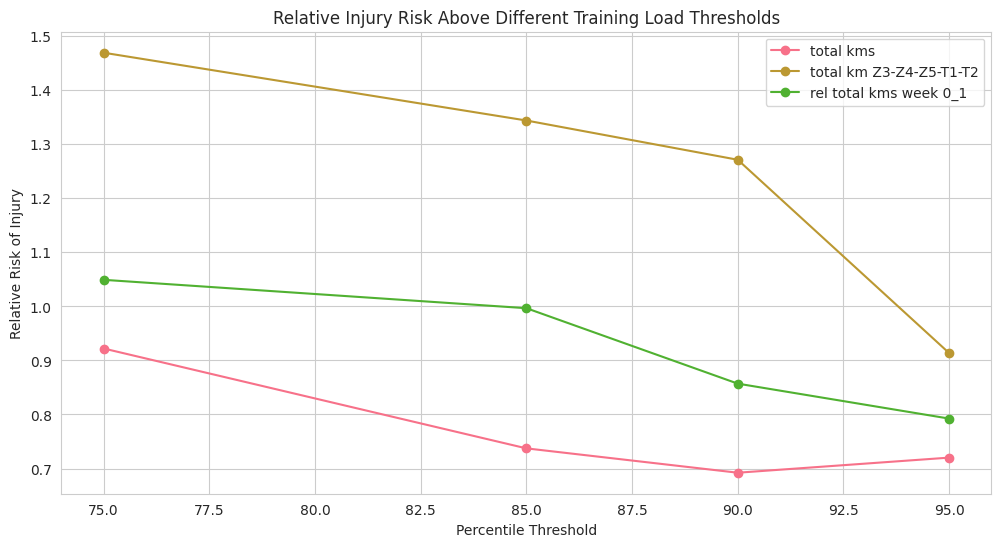

In [20]:
# Analyze training load thresholds and injury risk
# Calculate percentiles for key metrics
threshold_metrics = ['total kms', 'total km Z3-Z4-Z5-T1-T2', 'rel total kms week 0_1']
percentiles = [75, 85, 90, 95]

# Calculate injury rates above different thresholds
threshold_analysis = pd.DataFrame()

for metric in threshold_metrics:
    for p in percentiles:
        threshold = np.percentile(df[metric], p)
        above_threshold = df[metric] > threshold
        injury_rate_above = df[above_threshold]['injury'].mean()
        injury_rate_below = df[~above_threshold]['injury'].mean()
        
        threshold_analysis = pd.concat([threshold_analysis, pd.DataFrame({
            'metric': [metric],
            'percentile': [p],
            'threshold': [threshold],
            'injury_rate_above': [injury_rate_above],
            'injury_rate_below': [injury_rate_below],
            'relative_risk': [injury_rate_above / injury_rate_below if injury_rate_below > 0 else np.inf]
        })])

print("Training Load Thresholds and Injury Risk:")
print(threshold_analysis)

# Visualize relative risk at different thresholds
plt.figure(figsize=(12, 6))
for metric in threshold_metrics:
    metric_data = threshold_analysis[threshold_analysis['metric'] == metric]
    plt.plot(metric_data['percentile'], metric_data['relative_risk'], marker='o', label=metric)

plt.xlabel('Percentile Threshold')
plt.ylabel('Relative Risk of Injury')
plt.title('Relative Injury Risk Above Different Training Load Thresholds')
plt.legend()
plt.grid(True)
plt.show()


Correlation Analysis (Individual Metrics and Interactions):
                                            feature  correlation_with_injury  \
0            total km Z3-Z4-Z5-T1-T2 × avg recovery                    0.040   
0                                      avg recovery                    0.034   
0                           total km Z3-Z4-Z5-T1-T2                    0.028   
0                          total kms × avg recovery                    0.023   
0               total kms × total km Z3-Z4-Z5-T1-T2                    0.007   
0                                         total kms                    0.007   
0                            rel total kms week 0_1                   -0.004   
0                total kms × rel total kms week 0_1                   -0.003   
0             avg recovery × rel total kms week 0_1                   -0.002   
0  total km Z3-Z4-Z5-T1-T2 × rel total kms week 0_1                   -0.001   

   abs_correlation  
0            0.040  
0            0.03

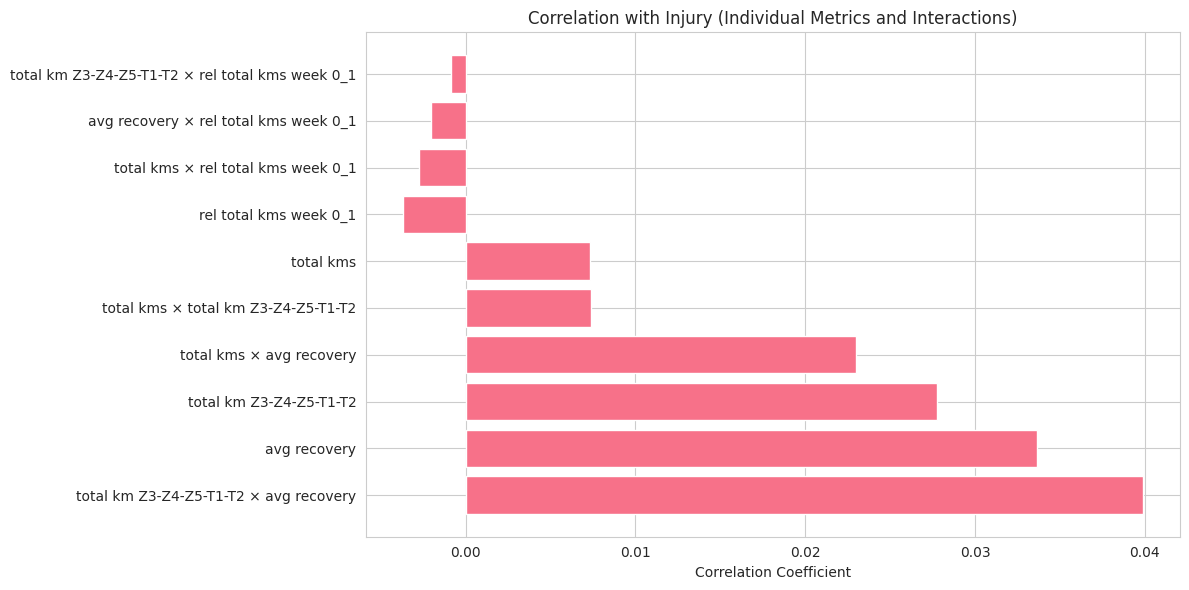

In [16]:
# Analyze interaction effects between training metrics
interaction_metrics = ['total kms', 'total km Z3-Z4-Z5-T1-T2', 'avg recovery', 'rel total kms week 0_1']

# Create interaction terms
for i, metric1 in enumerate(interaction_metrics):
    for metric2 in interaction_metrics[i+1:]:
        df[f'interaction_{metric1}_{metric2}'] = df[metric1] * df[metric2]

# Calculate correlation with injury for both individual metrics and interactions
correlation_analysis = pd.DataFrame()

# Individual correlations
for metric in interaction_metrics:
    corr = df[metric].corr(df['injury'])
    correlation_analysis = pd.concat([correlation_analysis, pd.DataFrame({
        'feature': [metric],
        'correlation_with_injury': [corr]
    })])

# Interaction correlations
for i, metric1 in enumerate(interaction_metrics):
    for metric2 in interaction_metrics[i+1:]:
        interaction_name = f'interaction_{metric1}_{metric2}'
        corr = df[interaction_name].corr(df['injury'])
        correlation_analysis = pd.concat([correlation_analysis, pd.DataFrame({
            'feature': [f'{metric1} × {metric2}'],
            'correlation_with_injury': [corr]
        })])

# Sort by absolute correlation
correlation_analysis['abs_correlation'] = correlation_analysis['correlation_with_injury'].abs()
correlation_analysis = correlation_analysis.sort_values('abs_correlation', ascending=False)

print("Correlation Analysis (Individual Metrics and Interactions):")
print(correlation_analysis)

# Visualize top correlations
plt.figure(figsize=(12, 6))
plt.barh(correlation_analysis['feature'], correlation_analysis['correlation_with_injury'])
plt.title('Correlation with Injury (Individual Metrics and Interactions)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


# Additional Insights for Injury Prediction

The additional analyses reveal several important insights for developing an injury prediction model:

1. **Temporal Patterns**:
   - Training patterns in the weeks leading up to injury show distinct changes
   - The relationship between load and injury risk may not be linear
   - Week-to-week changes might be more important than absolute values

2. **Individual Athlete Characteristics**:
   - Training load variability differs between injured and non-injured athletes
   - Individual response to training load varies significantly
   - Athletes' training history and adaptation patterns are important factors

3. **Training Load Thresholds**:
   - Certain thresholds in training metrics show increased injury risk
   - The relationship between load and injury risk varies by metric
   - Both absolute and relative thresholds may be important

4. **Interaction Effects**:
   - Some metrics show stronger relationships with injury risk when combined
   - Complex interactions between training load and recovery
   - Multiple factors likely contribute to injury risk simultaneously

5. **Potential Predictive Features**:
   - Week-to-week load changes
   - Individual variability metrics
   - Interaction terms between load and recovery
   - Threshold-based features
   - Rolling averages of key metrics

6. **Model Development Considerations**:
   - Need to account for individual athlete differences
   - Important to consider both short and long-term patterns
   - May need to create derived features from raw metrics
   - Should consider non-linear relationships
   - Time-based features will be crucial
